1
0.8
0.6
   time1  Susceptible_rho_1  Exposed_rho_1  Infected_rho_1  Recovered_rho_1  \
0    0.0           0.999900       0.000100        0.000000     0.000000e+00   
1    0.1           0.999900       0.000098        0.000002     0.000000e+00   
2    0.2           0.999900       0.000096        0.000004     1.000000e-07   
3    0.3           0.999899       0.000095        0.000006     2.930000e-07   
4    0.4           0.999898       0.000094        0.000007     5.727400e-07   

   time0.8  Susceptible_rho_0.8  Exposed_rho_0.8  Infected_rho_0.8  \
0      0.0             0.999900         0.000100          0.000000   
1      0.1             0.999900         0.000098          0.000002   
2      0.2             0.999900         0.000096          0.000004   
3      0.3             0.999899         0.000095          0.000006   
4      0.4             0.999898         0.000094          0.000007   

   Recovered_rho_0.8  time0.6  Susceptible_rho_0.6  Exposed_rho_0.6  \
0       0.000000e+00   

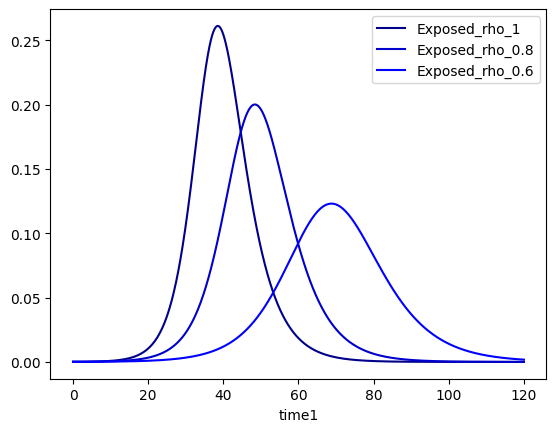

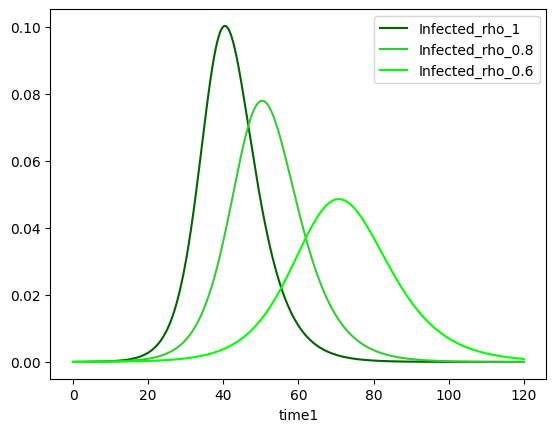

In [1]:
#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# https://www.youtube.com/channel/UC34rW-HtPJulxr5wp2Xa04w
"""

Based on the blog aricle:
https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296

Social distancing:
Reduce person-to-person contact in order to make spreading the disease less likely.
Spread out the spread of disease in time as much as possible to allow hospitals to
help every sick patient to minimize deaths, increase survival rate.

Simulate the situation using SEIR epidemiological model
S = Sucsceptible
E = Exposed
I = Infected
R = Recovered

Population moves from one stage to the other.
dS/dt = - rho * beta * S * I
dE/dt = (rho * beta * S * I) - (alpha * I)
dI/dt = (alpha * E) - (gamma * I)
dR/dt = gamma * I

N = S + E + I + R (total population is fixed)

alpha is the inverse of the incubation period (1/t_incubation)
beta is the average contact rate in the population
gamma is the inverse of the mean infectious period (1/t_infectious)
rho is the social distancing effect. (Contact rate between people)
Rho = 1 means no social distancing. 0 means everyone is locked down, no contact at all.

R0 = beta/gamma   ----- (high R0 implies faster spreading disease)
"""

#Basic SEIR Model:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
t_max = 120 #Maximum time, in days
dt = .1 #time steps, in days

t = np.linspace(0, t_max, int(t_max/dt) + 1) #create time datapoints for our calculation

N = 10000  #total population

#Initial values: use normalized population values...
#Initial Susceptible: If we begin with 1 exposed person then remaining 9,999 are susceptible
#so our S_0 will be 1 - 1/N
#Exposed will be 1/N
#Infected and recovered will be 0 initially
init_vals = 1 - 1/N, 1/N, 0, 0

alpha = 0.2  #Incubation 5 days (from recent paper by Hellewell et.al. 2020)

gamma = 0.5 #from another paper 1/2 days.
# https://arxiv.org/pdf/2002.06563.pdf

beta = 1.75 #Calculated using R0 = beta/gamma (from Hellewell paper R0 is 3.5)

#rho = 1 #1 means no social distancing or quarantine. 0 means everyone is locked down

params = alpha, beta, gamma

def seir_model_with_soc_dist(init_vals, params, t, rho):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for k in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return S, E, I, R, t

# Run the claculation
#results = seir_model_with_soc_dist(init_vals, params, t)
# Plot results
import pandas as pd
df = pd.DataFrame()
for rho in (1, 0.8, 0.6):
    print(rho)
    S, E, I, R, t = seir_model_with_soc_dist(init_vals, params, t, rho)
    df['time'+str(rho)] = t
    df['Susceptible_rho_'+str(rho)] = S
    df['Exposed_rho_'+str(rho)] = E
    df['Infected_rho_'+str(rho)] = I
    df['Recovered_rho_'+str(rho)] = R

print(df.head())


df.plot('time1', y=['Exposed_rho_1', 'Exposed_rho_0.8', 'Exposed_rho_0.6'],
    color=['darkblue', 'mediumblue', 'blue'])
plt.show()

df.plot('time1', y=['Infected_rho_1','Infected_rho_0.8', 'Infected_rho_0.6'],
    color=['darkgreen', 'limegreen', 'lime'])
plt.show()

#Peak infected rate goes from base 10% to 4% from social distancing.




